# 1.Import & Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import plotly.express as px

# Load the data
df = pd.read_csv('../data/raw/togo-dapaong_qc.csv')
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.set_index('Timestamp', inplace=True)
df.head()


,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
Timestamp,,,,,,,,,,,,,,,,,,
2021-10-25 00:01:00,-1.3,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,0.4,227.6,1.1,977,0,0.0,24.7,24.4,NaN
2021-10-25 00:02:00,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,0.4,229.3,0.7,977,0,0.0,24.7,24.4,NaN
2021-10-25 00:03:00,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,0.3,228.5,2.9,977,0,0.0,24.7,24.4,NaN
2021-10-25 00:04:00,-1.2,0.0,0.0,0.0,0.0,24.8,94.3,1.2,1.6,0.3,229.1,4.6,977,0,0.0,24.7,24.4,NaN
2021-10-25 00:05:00,-1.2,0.0,0.0,0.0,0.0,24.8,94.0,1.3,1.6,0.4,227.5,1.6,977,0,0.0,24.7,24.4,NaN


# 2.Summary Statistics & Missing Report

In [4]:
summary = df.describe()
summary.T
missing_values = df.isna().sum()
missing_percent = (missing_values / len(df)) * 100
pd.DataFrame({'Missing Values': missing_values, 'Percent': missing_percent})


,Missing Values,Percent
GHI,0,0.0
DNI,0,0.0
DHI,0,0.0
ModA,0,0.0
ModB,0,0.0
Tamb,0,0.0
RH,0,0.0
WS,0,0.0
WSgust,0,0.0
WSstdev,0,0.0


# 3. Outlier Detection & Cleaning

In [3]:
cols_to_check = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
z_scores = np.abs(stats.zscore(df[cols_to_check]))
df['Outlier'] = (z_scores > 3).any(axis=1)

irradiance_cols = ['GHI', 'DNI', 'DHI']
df[irradiance_cols] = df[irradiance_cols].applymap(lambda x: np.nan if x < 0 else x)
df[cols_to_check] = df[cols_to_check].fillna(df[cols_to_check].median())
df.drop(columns='Outlier', inplace=True)


C:\Users\hp\AppData\Local\Temp\ipykernel_7884\348123501.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[irradiance_cols] = df[irradiance_cols].applymap(lambda x: np.nan if x < 0 else x)


# 4. Export Cleaned Data

In [5]:
df.to_csv("../data/togo_clean.csv", index=False)

# 5.Time Series Analysis

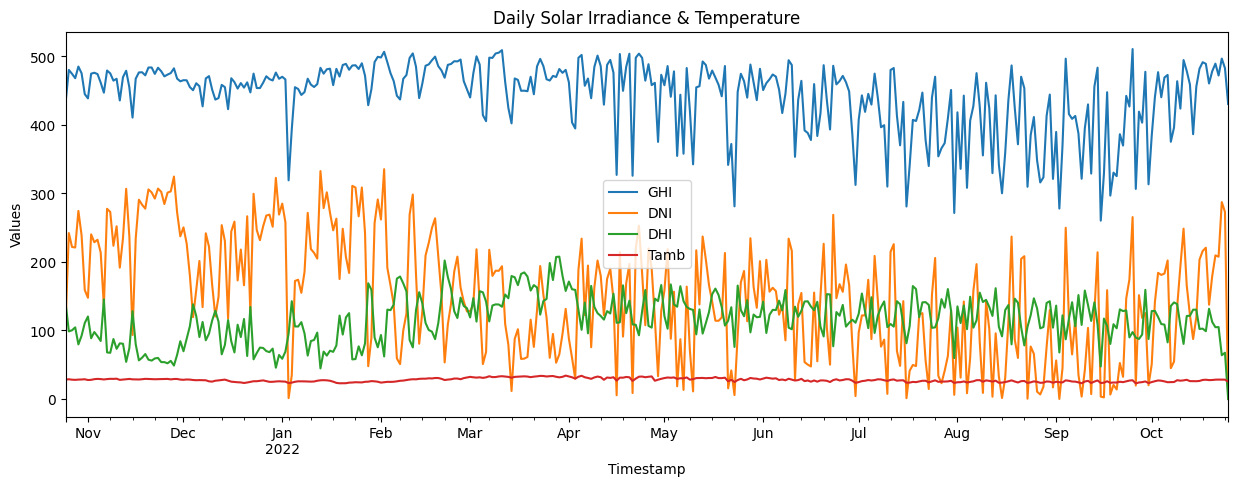

In [6]:
df[['GHI', 'DNI', 'DHI', 'Tamb']].resample('D').mean().plot(figsize=(15,5))
plt.title("Daily Solar Irradiance & Temperature")
plt.ylabel("Values")
plt.show()


# 6.Cleaning Impact

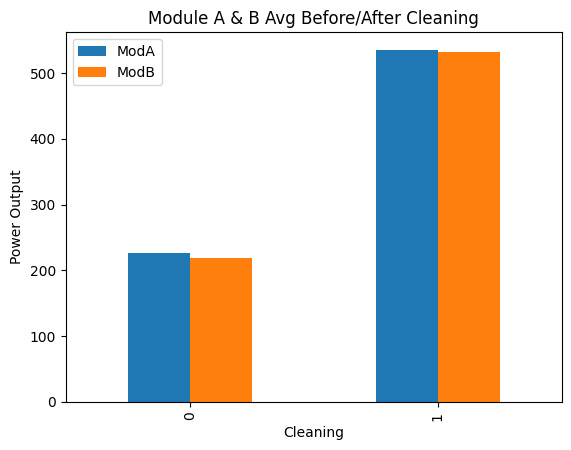

In [7]:
df.groupby('Cleaning')[['ModA', 'ModB']].mean().plot(kind='bar', title='Module A & B Avg Before/After Cleaning')
plt.ylabel("Power Output")
plt.show()


# 7.Correlation Heatmap

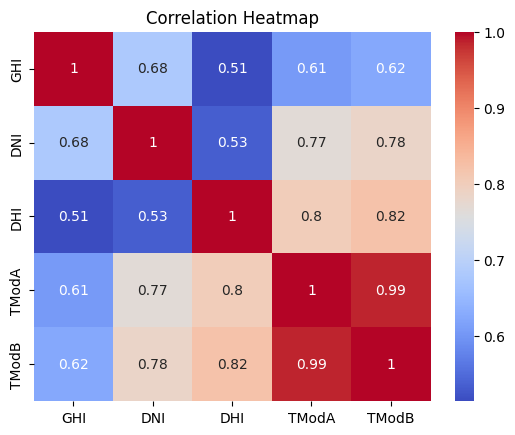

In [8]:
corr_cols = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']
sns.heatmap(df[corr_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


# 8.Scatter Plots

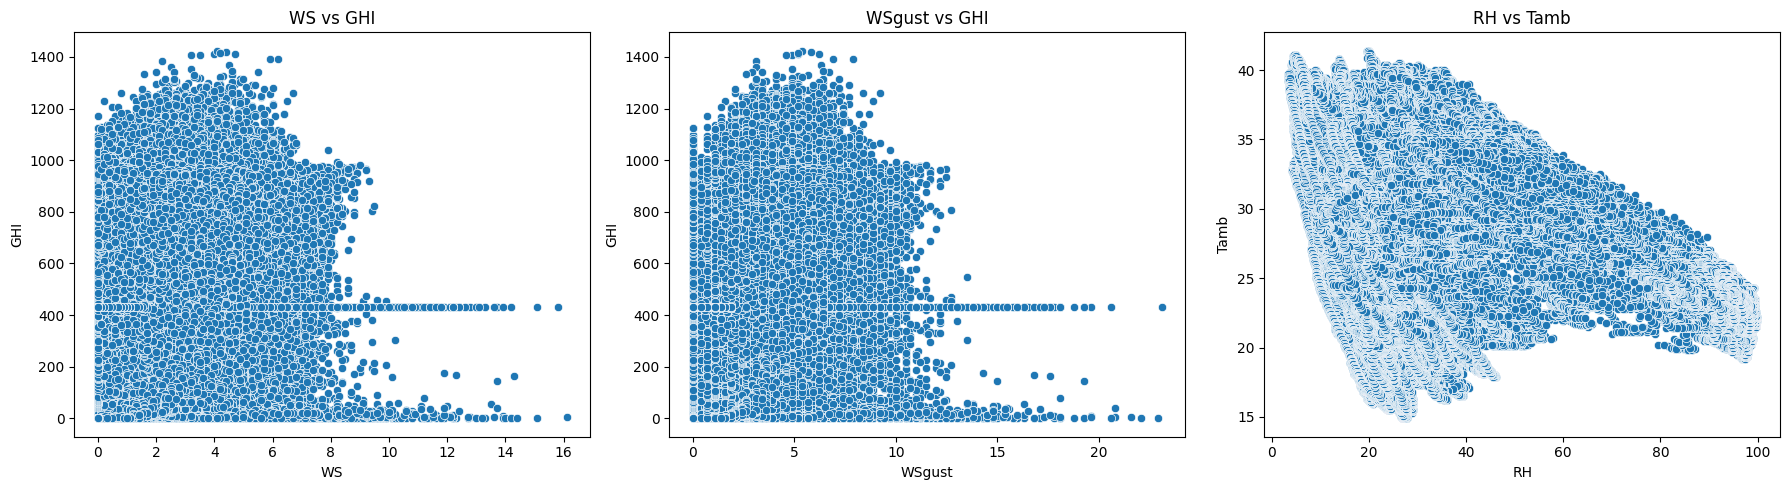

In [9]:
fig, ax = plt.subplots(1, 3, figsize=(18, 5))
sns.scatterplot(data=df, x='WS', y='GHI', ax=ax[0])
sns.scatterplot(data=df, x='WSgust', y='GHI', ax=ax[1])
sns.scatterplot(data=df, x='RH', y='Tamb', ax=ax[2])
ax[0].set_title("WS vs GHI")
ax[1].set_title("WSgust vs GHI")
ax[2].set_title("RH vs Tamb")
plt.tight_layout()
plt.show()


# 9.Distribution Analysis

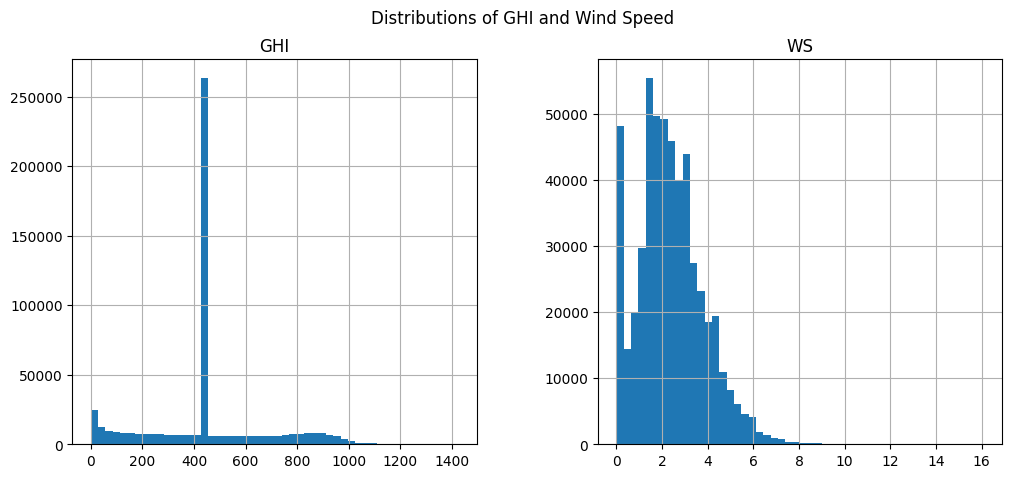

In [10]:
df[['GHI', 'WS']].hist(bins=50, figsize=(12,5))
plt.suptitle("Distributions of GHI and Wind Speed")
plt.show()


# 10.RH vs Temp

c:\Users\hp\Desktop\KAIM-solar-challenge-week0\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


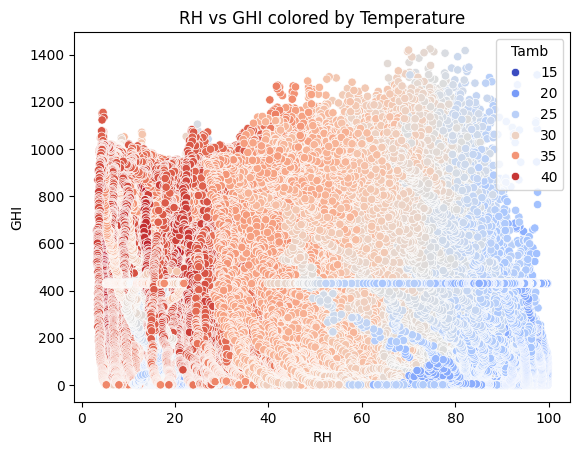

In [11]:
sns.scatterplot(data=df, x='RH', y='GHI', hue='Tamb', palette='coolwarm')
plt.title("RH vs GHI colored by Temperature")
plt.show()


# 11.Bubble Chart

In [12]:
fig = px.scatter(df.sample(5000), x='GHI', y='Tamb', size='RH', color='BP',
                 title="GHI vs Tamb (Bubble size: RH, Color: BP)")
fig.show()
